In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.set_index(['PassengerId'])

Since Passenger ID and index are the same, I replaced index with passenger ID

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 11)

In [7]:
#To find the columns with more unique variables
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

We can see that Name and Ticket mostly contains unique values

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see that a good percentage of Cabin has null values, so it can be removed. 

Null values in Age will be replaced by mean. 

Null values in Embarked will be replaed by most frequent. 

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Here we can see that Sex is an object, so it has to be label encoded, name will be removed since it's all unique and it will probably have 0 correlation with any other columns. Cabin will also be removed, and embarked will be label encoded. 

### Removing unwanted columns

In [10]:
df = df.drop(['Name', 'Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


### Filling the NaN values

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Embarked'] = si.fit_transform(df['Embarked'].values.reshape(-1, 1))

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.000000,1,0,113803,53.1000,S
5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,211536,13.0000,S
888,1,1,female,19.000000,0,0,112053,30.0000,S
889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S


### Label Encoding

In [17]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['Ticket'].nunique()

681

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [21]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
oe = OrdinalEncoder()
df['Ticket'] = oe.fit_transform(df['Ticket'].values.reshape (-1,1))

Used ordinal encoder here becaue of high number of different values. 

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,523.0,7.2500,2
2,1,1,0,38.0,1,0,596.0,71.2833,0
3,1,3,0,26.0,0,0,669.0,7.9250,2
4,1,1,0,35.0,1,0,49.0,53.1000,2
5,0,3,1,35.0,0,0,472.0,8.0500,2


### Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


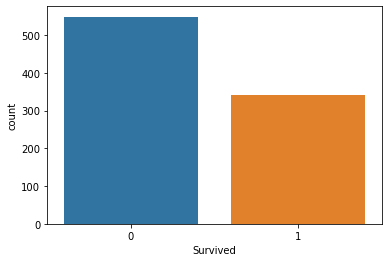

In [24]:
ax = sb.countplot(x = 'Survived', data = df)
print(df['Survived'].value_counts())

Optimistically, we can take 0 to be the number of survivors [549] and 1 to be the number of deaths [342].

3    491
1    216
2    184
Name: Pclass, dtype: int64


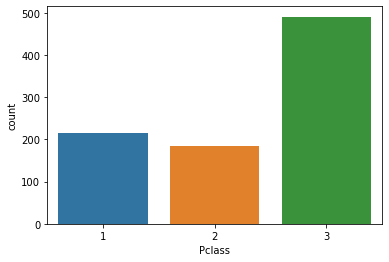

In [25]:
ax = sb.countplot(x = 'Pclass', data = df)
print(df['Pclass'].value_counts())

The number of passengers in Class 1 was 216, Class 2 was 184 and Class 3 was 491

1    577
0    314
Name: Sex, dtype: int64


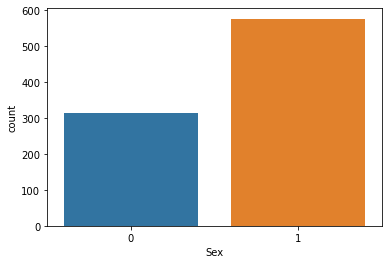

In [26]:
ax = sb.countplot(x = 'Sex', data = df)
print(df['Sex'].value_counts())

Here, we can see that there were 577 Males and 314 Females onboard

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


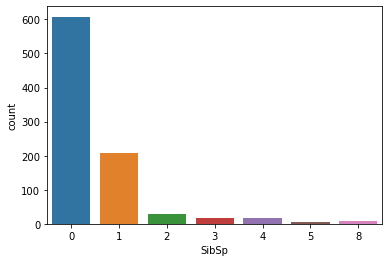

In [27]:
ax = sb.countplot(x = 'SibSp', data = df)
print(df['SibSp'].value_counts())

This graph shows 608 people had no siblings, and as a maximum, 8 people brought 7 sibings each onboard

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


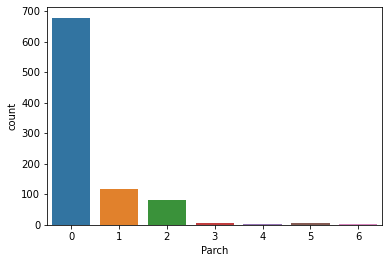

In [28]:
ax = sb.countplot(x = 'Parch', data = df)
print(df['Parch'].value_counts())

This graph shows the number of people onboard and the number of children they had brought along. 

2    646
0    168
1     77
Name: Embarked, dtype: int64


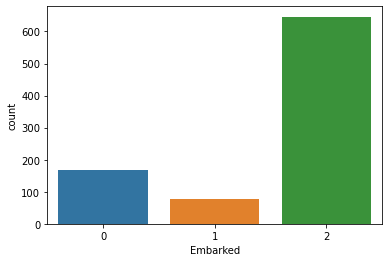

In [29]:
ax = sb.countplot(x = 'Embarked', data = df)
print(df['Embarked'].value_counts())

0/C = Cherbourg, 1/Q = Queenstown, 2/S = Southampton

From this graph we can see that 168 people onboarded from Cherbourg, 77 people onboarded from Queenstown and 646 people onboarded from Southampton

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64


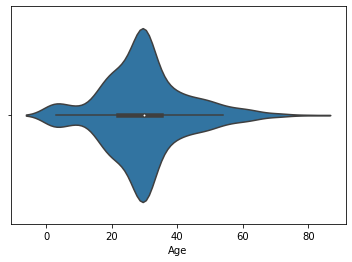

In [30]:
ax = sb.violinplot(x = 'Age', data = df)
print(df['Age'].value_counts())

Plotting the frequency of age of people present onbaord. We can see that the highest number of people in the ship are in the age group of 20 to 40, and the leaset is from 70-90

### Bivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Age'>

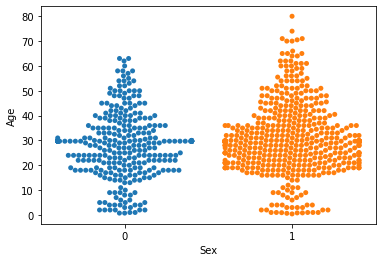

In [31]:
sb.swarmplot(x = 'Sex', y = 'Age', data = df)

This graph shows the age distribution of men and women onboard. For Men, the biggest group lies between 20 and 40, while for women, the biggest group lies in the 30 year old section.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

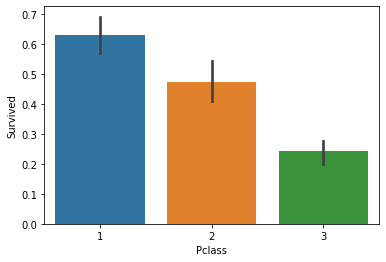

In [32]:
sb.barplot(x= "Pclass", y="Survived", data = df)

We can see that the highest number of people who survived was from the 1st Class. 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

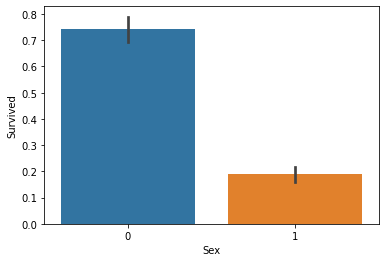

In [33]:
sb.barplot(x= "Sex", y="Survived", data = df)

From this graph we can see that the highest number of survivers were women. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

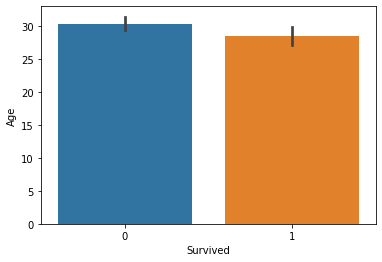

In [34]:
sb.barplot(x= "Survived", y="Age", data = df)

We can see that the highest number of both men and women who didn't survive were under 30 years of age. 

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

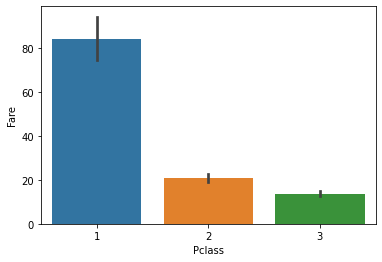

In [35]:
sb.barplot(x= "Pclass", y="Fare", data = df)

We can see that the 1st Class fares were quite higher than the 2nd and 3rd. 

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

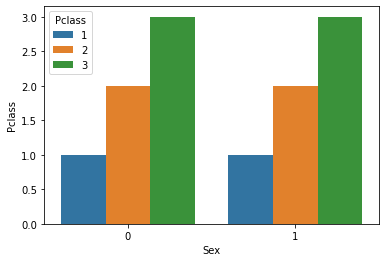

In [36]:
sb.barplot(x="Sex", y="Pclass", hue="Pclass", data=df) 

This graphs shows the distibution of male and females is equal irrespective of the class. 

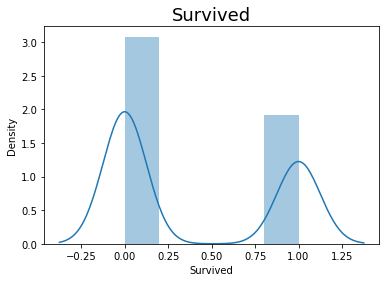

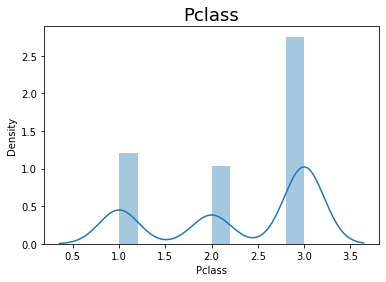

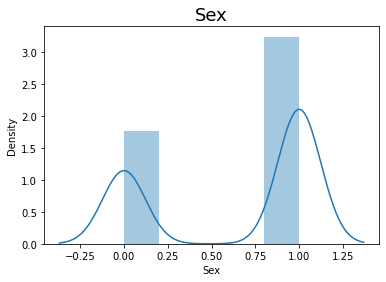

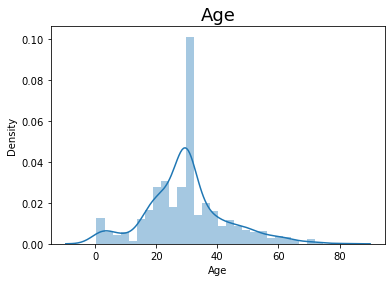

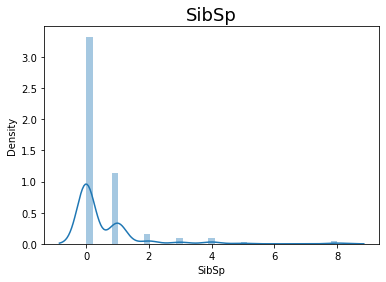

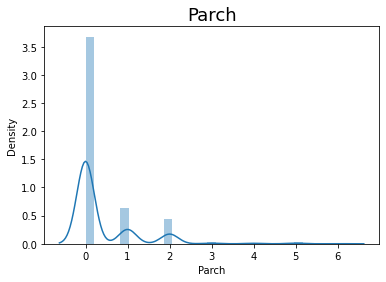

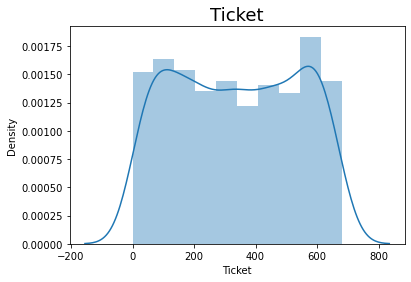

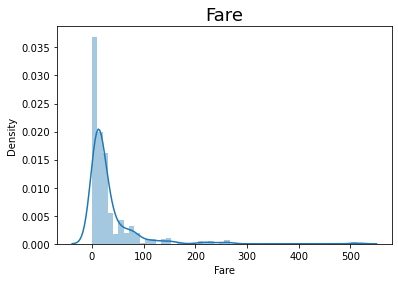

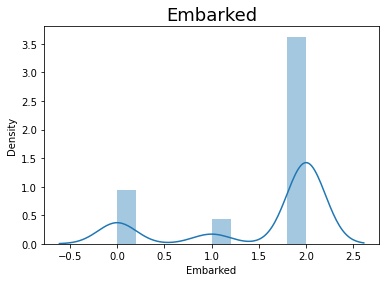

In [37]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']

for i in col:
    sb.distplot(df[i], kde = True)
    plt.title(i, fontsize = 18)
    plt.show()

Here, Survived, Pclass, Sex, SibSp, Parch, Ticket, Embarked are Categorical 

Age is not skewed.

Fare is skewed. 

### Describe the Dataset

In [38]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


Here we cannot see much difference between the mean and the max values for any values except Fare and Parch. 

We can see high difference in values between Age, SibSp, Parch and Fare. 

<AxesSubplot:>

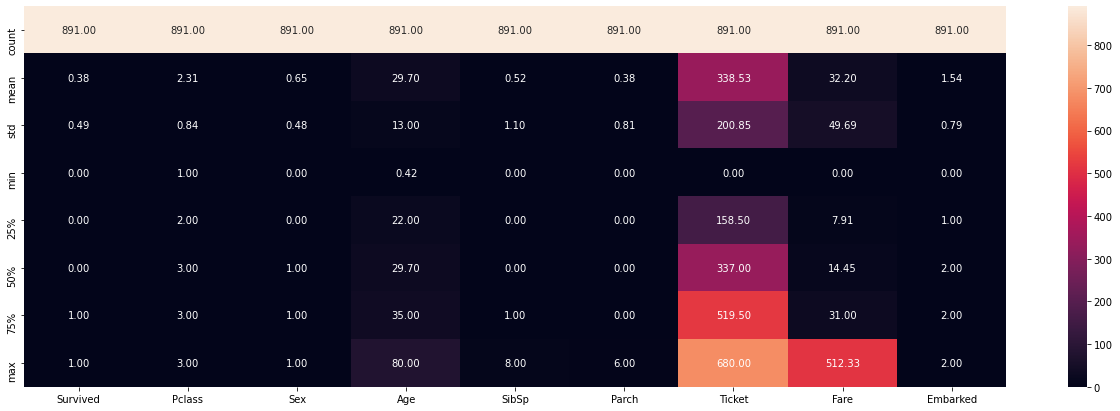

In [39]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

### Finding the Correlation. 

In [40]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


<AxesSubplot:>

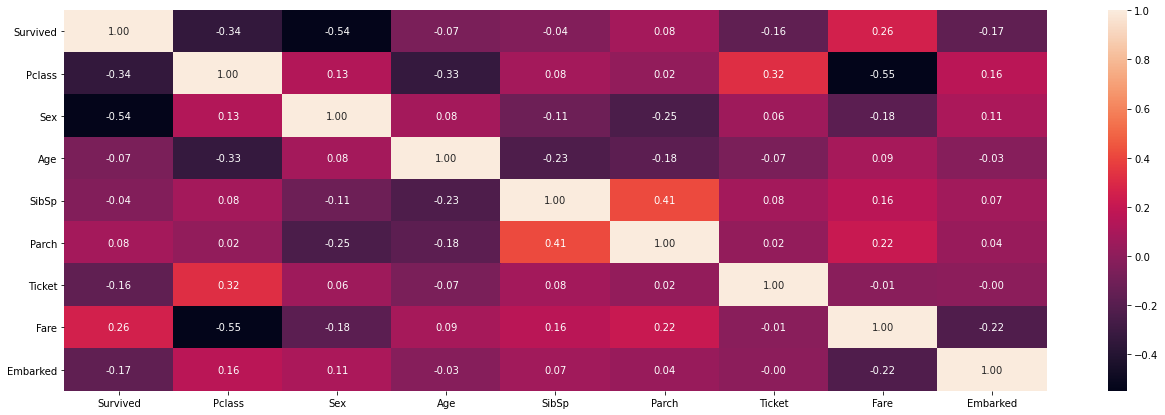

In [41]:
#Visualizing correlation using heatmap
plt.figure(figsize = (22,7))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

Here we are unable to find high positive correlation between any values. 



The best plots we can find are between ticket and Pclass & Parch and SibSp. 

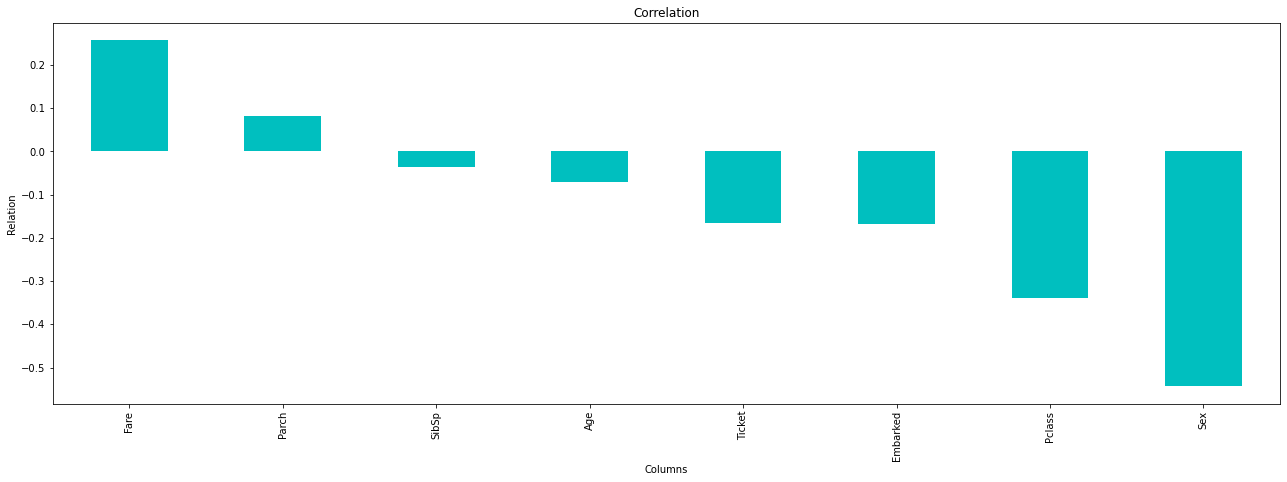

In [42]:
plt.figure(figsize = (22,7))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'c')
plt.xlabel('Columns')
plt.ylabel('Relation')
plt.title('Correlation')
plt.show()

In [43]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Embarked   -1.264823
dtype: float64

Keeping the normal skewness to be +/- 0.5, 

We can see high skewness in Pclass, Sex, SibSp, Parch, Fare, and Embarked. 

Here, except for Fare, all other columns are categorical, so we'll ignore those skewness. 

<AxesSubplot:>

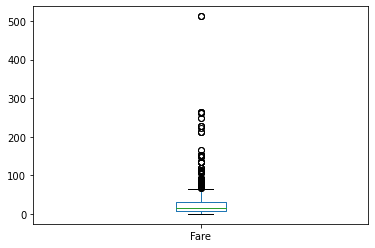

In [44]:
#Using boxplot to find outliers for Fare. 

df['Fare'].plot.box()

<AxesSubplot:xlabel='Fare'>

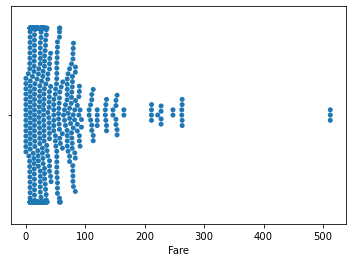

In [45]:
sb.swarmplot(x = 'Fare', data = df)

Since there are only less number of outliers, we can proceed without removing those. 

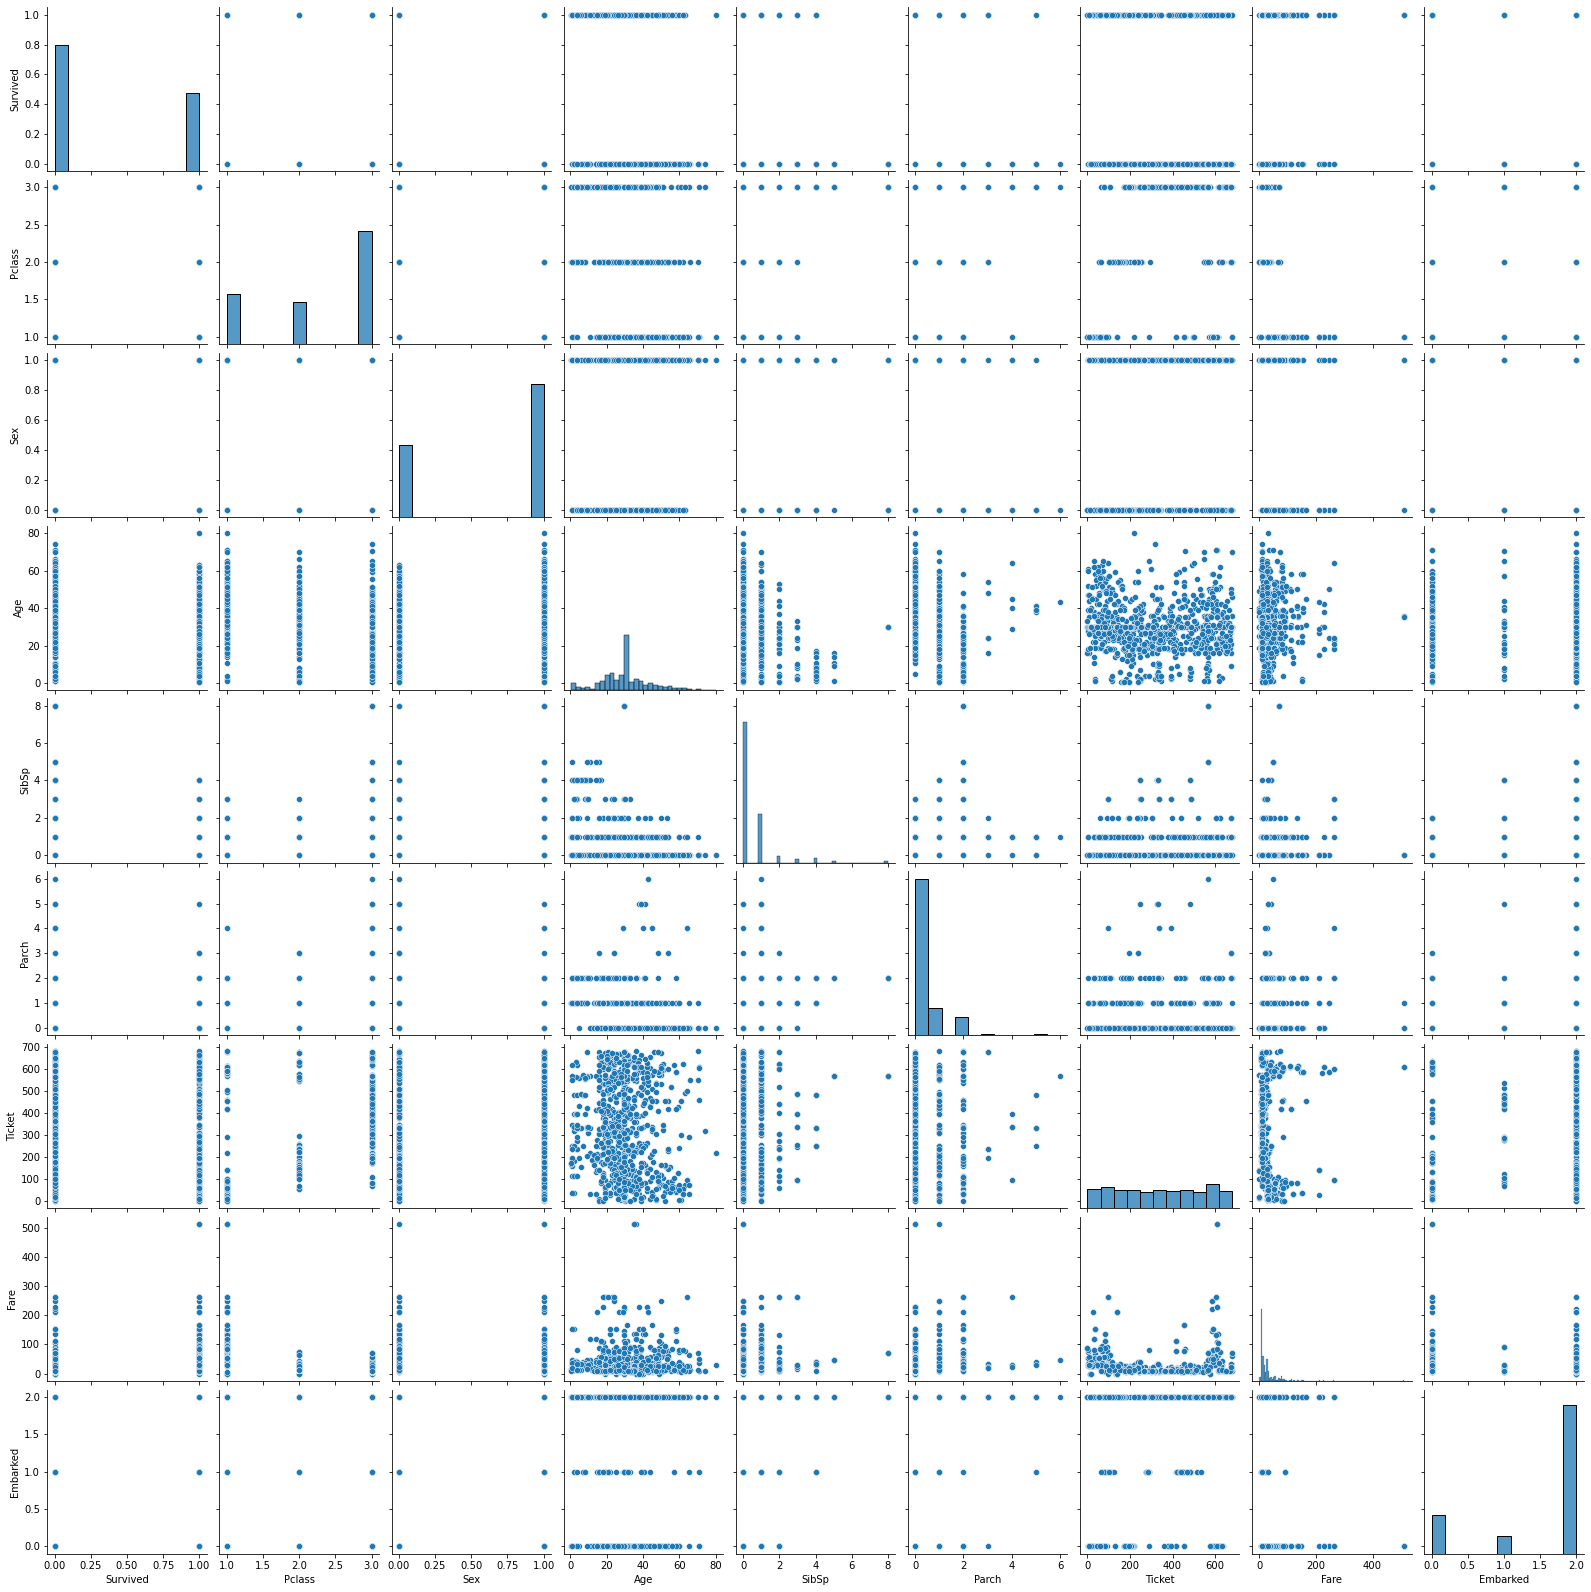

In [46]:
sb.pairplot(df)

### Considering outlier removal

In [47]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 7, 4, 4, 4, 4, 5, 7, 3, 3, 7, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        7, 4, 4, 4, 7, 7, 4, 7, 5, 7, 7, 4, 5, 5, 7, 4, 3, 7, 4, 4, 7, 5,
        5, 3, 5, 3, 5, 7, 4, 4, 7, 7, 7, 7, 5, 7, 7, 3, 5, 7, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

We can see there are only less number of outliers, so we can proceed to remove them. 

In [48]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,523.0,7.2500,2
2,1,1,0,38.000000,1,0,596.0,71.2833,0
3,1,3,0,26.000000,0,0,669.0,7.9250,2
4,1,1,0,35.000000,1,0,49.0,53.1000,2
5,0,3,1,35.000000,0,0,472.0,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,101.0,13.0000,2
888,1,1,0,19.000000,0,0,14.0,30.0000,2
889,0,3,0,29.699118,1,2,675.0,23.4500,2


In [49]:
df_new.shape

(820, 9)

In [50]:
#Finding the percentage of dataloss

loss = ((891-820)/891)*100
loss

7.968574635241302

Since the dataloss will be almost 8%, we can proceed without removing the outliers. 

### Separating X and Y

In [51]:
x = df.iloc[:, 1:8]
y = df.iloc[:, 0]

In [52]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
1,3,1,22.0,1,0,523.0,7.2500
2,1,0,38.0,1,0,596.0,71.2833
3,3,0,26.0,0,0,669.0,7.9250
4,1,0,35.0,1,0,49.0,53.1000
5,3,1,35.0,0,0,472.0,8.0500


In [53]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Scaling using the MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [55]:
x = mms.fit_transform(x)

In [56]:
x.shape

(891, 7)

In [57]:
y.shape

(891,)

### Finding the best random state

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test, pred_test)}')
    print('\n')

At random state 0, the training accuracy is: 0.8025682182985554
At random state 0, the testing accuracy is: 0.7798507462686567


At random state 1, the training accuracy is: 0.8202247191011236
At random state 1, the testing accuracy is: 0.7649253731343284


At random state 2, the training accuracy is: 0.8138041733547352
At random state 2, the testing accuracy is: 0.7873134328358209


At random state 3, the training accuracy is: 0.8170144462279294
At random state 3, the testing accuracy is: 0.753731343283582


At random state 4, the training accuracy is: 0.7817014446227929
At random state 4, the testing accuracy is: 0.8246268656716418


At random state 5, the training accuracy is: 0.797752808988764
At random state 5, the testing accuracy is: 0.8246268656716418


At random state 6, the training accuracy is: 0.7849117174959872
At random state 6, the testing accuracy is: 0.8544776119402985


At random state 7, the training accuracy is: 0.8234349919743178
At random state 7, the testing accu

At random state 71, the training accuracy is: 0.7897271268057785
At random state 71, the testing accuracy is: 0.8134328358208955


At random state 72, the training accuracy is: 0.797752808988764
At random state 72, the testing accuracy is: 0.7985074626865671


At random state 73, the training accuracy is: 0.8089887640449438
At random state 73, the testing accuracy is: 0.7947761194029851


At random state 74, the training accuracy is: 0.7993579454253612
At random state 74, the testing accuracy is: 0.8171641791044776


At random state 75, the training accuracy is: 0.8234349919743178
At random state 75, the testing accuracy is: 0.7611940298507462


At random state 76, the training accuracy is: 0.8041733547351525
At random state 76, the testing accuracy is: 0.8171641791044776


At random state 77, the training accuracy is: 0.8009630818619583
At random state 77, the testing accuracy is: 0.7910447761194029


At random state 78, the training accuracy is: 0.7800963081861958
At random state 78,

We're taking the best random state as 19

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 19)

In [61]:
x_train.shape

(623, 7)

In [62]:
x_test.shape

(268, 7)

In [63]:
y_train.shape

(623,)

In [64]:
y_test.shape

(268,)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

In [67]:
model = [gnb, mnb, knn, dtc, svc, rfc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  GaussianNB()
0.7873134328358209
[[133  33]
 [ 24  78]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       166
           1       0.70      0.76      0.73       102

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Accuracy Score  :  MultinomialNB()
0.6604477611940298
[[164   2]
 [ 89  13]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.78       166
           1       0.87      0.13      0.22       102

    accuracy                           0.66       268
   macro avg       0.76      0.56      0.50       268
weighted avg       0.73      0.66      0.57       268

Accuracy Score  :  KNeighborsClassifier()
0.8059701492537313
[[149  17]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       166
  

### Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

Using for loop to find the best cross val score which gives us the best values.

In [69]:
model = [gnb, mnb, knn, dtc, svc, rfc, abc]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')
    

GaussianNB()
[0.7676978888497002, 0.7676767676767676, 0.7699521270149073, 0.7733224530789028, 0.7733463329100912, 0.7766714707536558, 0.7688425032175032, 0.7721661054994389]
CV Value =  7
Best Score = 0.7766714707536558


MultinomialNB()
[0.6520683226684134, 0.6531986531986532, 0.6487193471498404, 0.6509760843638189, 0.6509386903682205, 0.654334223847019, 0.6520773005148005, 0.6520763187429854]
CV Value =  7
Best Score = 0.654334223847019


KNeighborsClassifier()
[0.7856426663979443, 0.8002244668911335, 0.7968630065042621, 0.7991400414286611, 0.8013936755547494, 0.7980174353205849, 0.8092925514800515, 0.7968574635241301]
CV Value =  8
Best Score = 0.8092925514800515


DecisionTreeClassifier()
[0.7575678943920996, 0.745230078563412, 0.7744111824829314, 0.7890276818780994, 0.7643524396880101, 0.7779105736782902, 0.7732866795366795, 0.7710437710437711]
CV Value =  5
Best Score = 0.7890276818780994


SVC()
[0.7867511462689575, 0.8058361391694725, 0.8035995636892498, 0.8047078023978406, 0.8

Adaboost has the smallest difference between the model accuracy score and the CV score. So this is the method that we're going to choose. 

### GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'algorithm':['SAMME.R', 'SAMME'], 'n_estimators':[10, 50, 100]}
abc = AdaBoostClassifier()
gscv = GridSearchCV(abc, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'algorithm': 'SAMME', 'n_estimators': 100}


In [72]:
abc_final = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 100)
abc_final.fit(x_train, y_train)
pred_abc = abc_final.predict(x_test)
print('Accuracy Score  : ', abc_final)
print(accuracy_score(y_test, pred_abc))
print(confusion_matrix(y_test, pred_abc))
print(classification_report(y_test, pred_abc))

Accuracy Score  :  AdaBoostClassifier(algorithm='SAMME', n_estimators=100)
0.8246268656716418
[[155  11]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       166
           1       0.86      0.65      0.74       102

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.82      0.82       268



We're getting an average of 82.98% comparing accuracy score of and cross val score. 

In [73]:
data = [pred_abc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
Actual,0,0,0,1,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0


### Creating the OBJ file

In [74]:
import joblib

In [75]:
joblib.dump(abc_final, 'Titanic.obj')

['Titanic.obj']

### Conclusion

In [76]:
final = joblib.load('Titanic.obj')
final.predict(x_train)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,